<a href="https://colab.research.google.com/github/AishuShans/Task-6---AI-ML-intern/blob/main/K_Nearest_Neighbors_(KNN)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1 : Loading the dataset and normalizing features

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Loading the Iris dataset

In [2]:
try:
    df = pd.read_csv('Iris_species.csv')
except FileNotFoundError:
    print("Error: Iris_species.csv not found. Please make sure the file is in the correct directory.")
    exit()

Drop the 'Id' column as it's just an index

In [3]:
df = df.drop('Id', axis=1)

Separate features (X) and target (y)

In [5]:
X = df.drop('Species', axis=1)
y = df['Species']


Split the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Initialize the StandardScaler

In [7]:
scaler = StandardScaler()

Fit the scaler to the training features and then transform both training and testing features

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Convert the scaled NumPy arrays back to Pandas DataFrames (optional, but can be helpful for inspection)

In [9]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("First 5 rows of the scaled training data:")
print(X_train_scaled_df.head())
print("\nFirst 5 rows of the scaled testing data:")
print(X_test_scaled_df.head())

First 5 rows of the scaled training data:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.413416     -1.464401      -0.100146     -0.321500
1       0.551222     -0.495821       0.717711      0.353650
2       0.671802      0.230614       0.951384      0.758740
3       0.912961     -0.011531       0.308783      0.218620
4       1.636440      1.441340       1.301894      1.703949

First 5 rows of the scaled testing data:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.310062     -0.495821       0.484037     -0.051440
1      -0.172257      1.925630      -1.268512     -1.266709
2       2.239339     -0.980111       1.769240      1.433889
3       0.189483     -0.253676       0.367201      0.353650
4       1.154121     -0.495821       0.542456      0.218620


TASK 2 : Use KNeighborsClassifier from sklearn

In [10]:
from sklearn.neighbors import KNeighborsClassifier

Initialize the KNN classifier with a default value of K=5

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)

Train the KNN classifier on the scaled training data

In [12]:
knn.fit(X_train_scaled, y_train)

print("\nKNeighborsClassifier initialized and trained with K=5.")


KNeighborsClassifier initialized and trained with K=5.


TASK 3 : Experiment with different values of K

In [13]:
from sklearn.metrics import accuracy_score


In [14]:
k_values = [1, 3, 5, 7, 9, 11, 15, 20]
accuracy_scores = []

In [15]:
for k in k_values:
    # Initialize KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test data
    y_pred = knn.predict(X_test_scaled)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Accuracy for K={k}: {accuracy:.4f}")

Accuracy for K=1: 0.9778
Accuracy for K=3: 1.0000
Accuracy for K=5: 1.0000
Accuracy for K=7: 1.0000
Accuracy for K=9: 1.0000
Accuracy for K=11: 1.0000
Accuracy for K=15: 1.0000
Accuracy for K=20: 1.0000


Plotting the accuracy scores for different K values

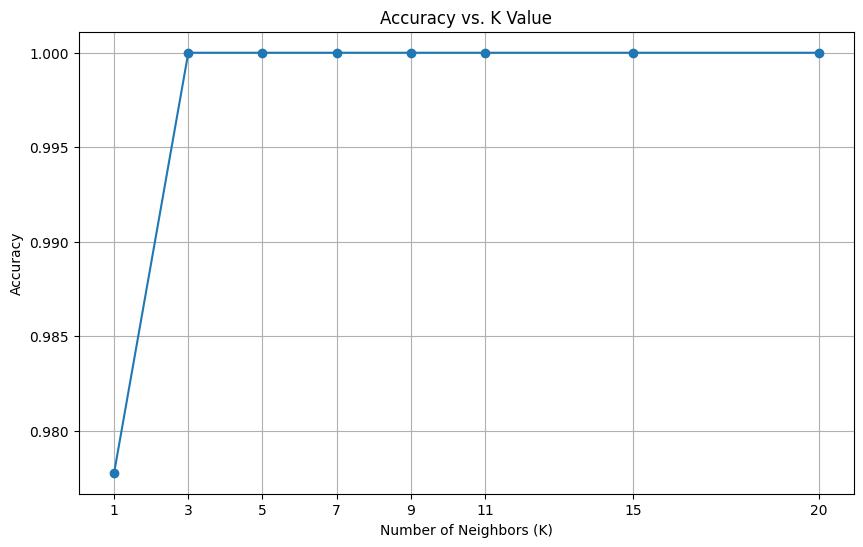

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

TASK 4 : Evaluate model using accuracy and confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Use the KNN model with the best performing K (let's assume it's K=5 for now,
# but you should choose based on the results from Task 3)
best_k = 5
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy with K={best_k}: {accuracy_best:.4f}")



Accuracy with K=5: 1.0000


In [19]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:")
print(cm)



Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Visualizing the confusion matrix

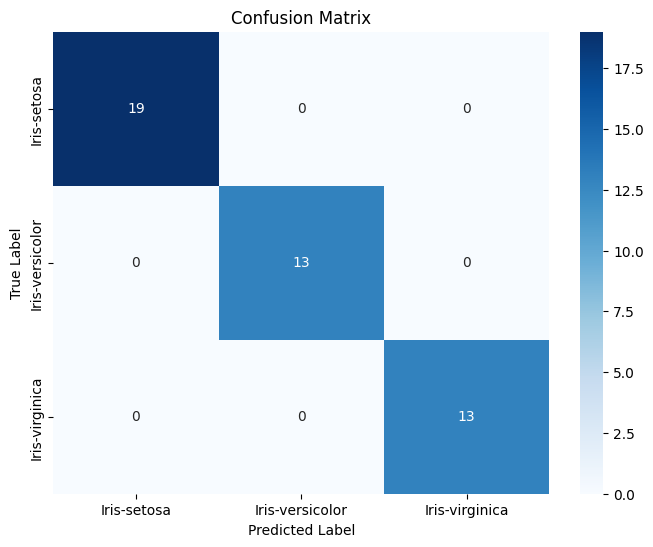

In [20]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_best.classes_, yticklabels=knn_best.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



Task 5 : Visualizing decision boundaries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [23]:
# For visualization, we'll use only the first two features: Sepal Length and Sepal Width
X_vis = X_train_scaled[:, :2]
y_vis = y_train

# Define the range of the decision boundary plot
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Try different values of K for visualization
k_values_vis = [1, 5, 15]

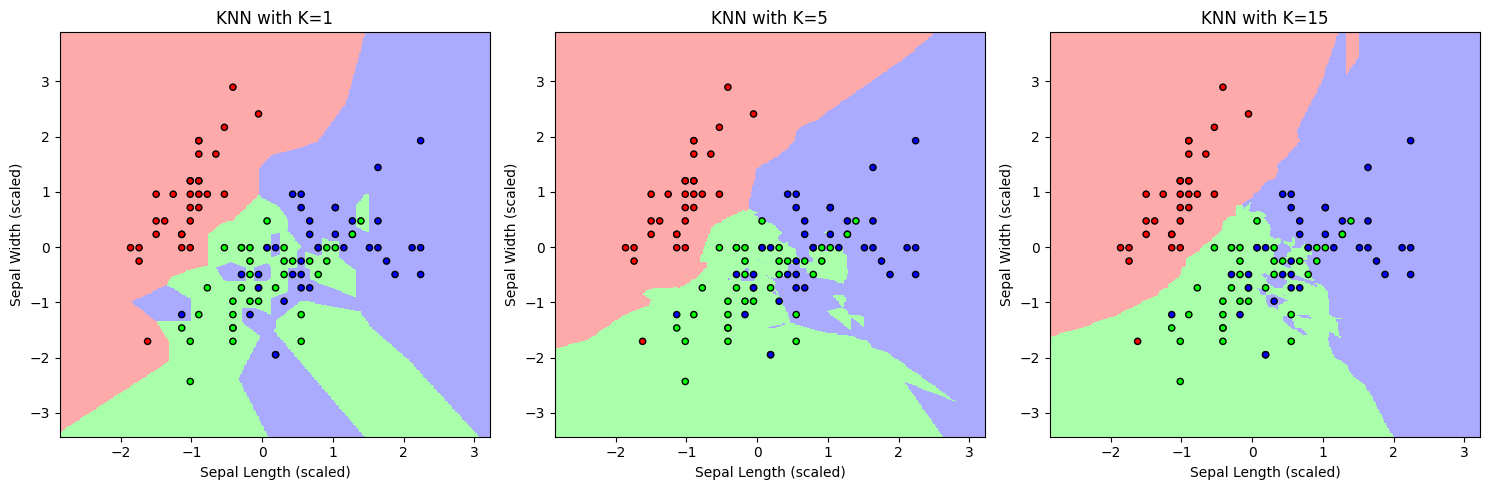

In [25]:
plt.figure(figsize=(15, 5))
for i, k in enumerate(k_values_vis):
    plt.subplot(1, len(k_values_vis), i + 1)
    knn_vis = KNeighborsClassifier(n_neighbors=k)
    knn_vis.fit(X_vis, y_vis)
    Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])

    # Convert string labels to numerical values for pcolormesh
    # Assuming y_vis contains unique labels: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
    label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    Z_numeric = np.array([label_mapping[label] for label in Z]) # Convert to numerical using mapping
    Z_numeric = Z_numeric.reshape(xx.shape) # Reshape to match xx and yy

    # Put the result into a color plot
    plt.pcolormesh(xx, yy, Z_numeric, cmap=cmap_light) # Use numerical Z for plotting

    # Plot the training points
    # Convert y_vis to numerical using the same mapping
    y_vis_numeric = np.array([label_mapping[label] for label in y_vis])
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis_numeric, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"KNN with K={k}")
    plt.xlabel("Sepal Length (scaled)")
    plt.ylabel("Sepal Width (scaled)")

plt.tight_layout()
plt.show()